In [1]:
import pandas as pd
import glob
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib widget

In [2]:
def pca_compile(df_list, class_list, indexer=None):
    if indexer != None:
        low_range = indexer[0]
        high_range = indexer[1]
    else:
        low_range = 0
        high_range = None

    wavenumber = pd.read_csv("wavenumber.csv", header=0).iloc[low_range:high_range]
    transformed_df = [df.iloc[low_range:high_range,:].T.reset_index(drop=True) for df in df_list]

    for df, class_name in zip(transformed_df, class_list):
        df.columns = wavenumber['wavenumber']
        df['class'] = class_name

    main_df = pd.concat(transformed_df, axis=0, ignore_index=True)
    main_df.columns.name = None

    return main_df

In [3]:
def run_pca(main_df, plot_title, colors):
    pca = PCA(n_components=2)
    scaler = StandardScaler()
    y = main_df.pop('class')
    X = main_df
    X = scaler.fit_transform(X)

    pca_result = pca.fit_transform(X)
    pca_df = pd.DataFrame(pca_result, columns=['PC 1', 'PC 2'])

    unique_classes = y.unique()
    # colors = plt.get_cmap('viridis', len(unique_classes))

    fig, ax = plt.subplots(figsize=(10,5))
    for i, class_name in enumerate(unique_classes):
        # Mask the data to select only points of the current class
        mask = (y == class_name)
        ax.scatter(pca_df[mask]['PC 1'], pca_df[mask]['PC 2'], label=str(class_name),
                   color=colors[i], marker='o')

    ax.set_title(plot_title)
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.legend(fontsize=7)

    plt.show()

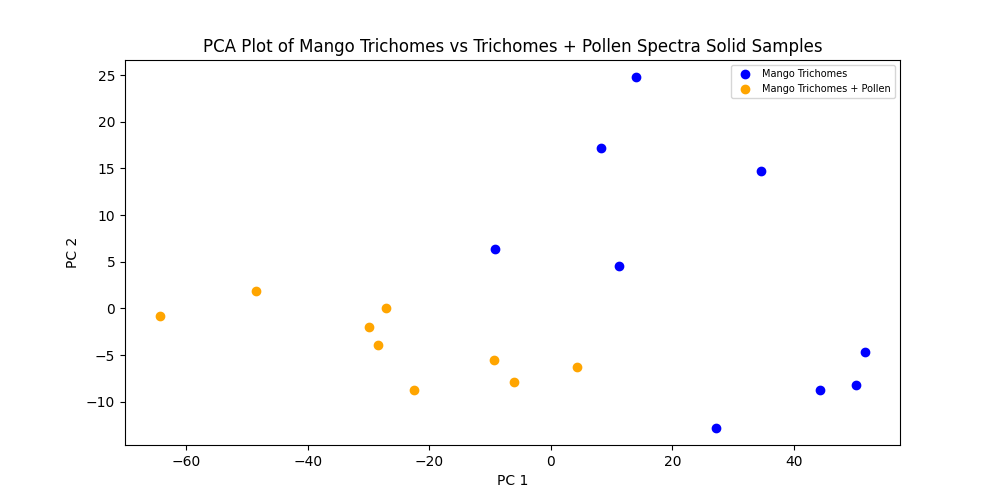

In [7]:
t = pd.read_csv("mango_trichomes/compiled_spectral_data/mango_trichomes_32_scans.csv")
t_p = pd.read_csv("trichomes_pollen/compiled_spectral_data/trichomes_pollen_scan32.csv")

formal_group_names = ["Mango Trichomes", "Mango Trichomes + Pollen"]

main_df = pca_compile([t, t_p], formal_group_names)
run_pca(main_df, plot_title="PCA Plot of Mango Trichomes vs Trichomes + Pollen Spectra Solid Samples", colors=['blue', 'orange'])

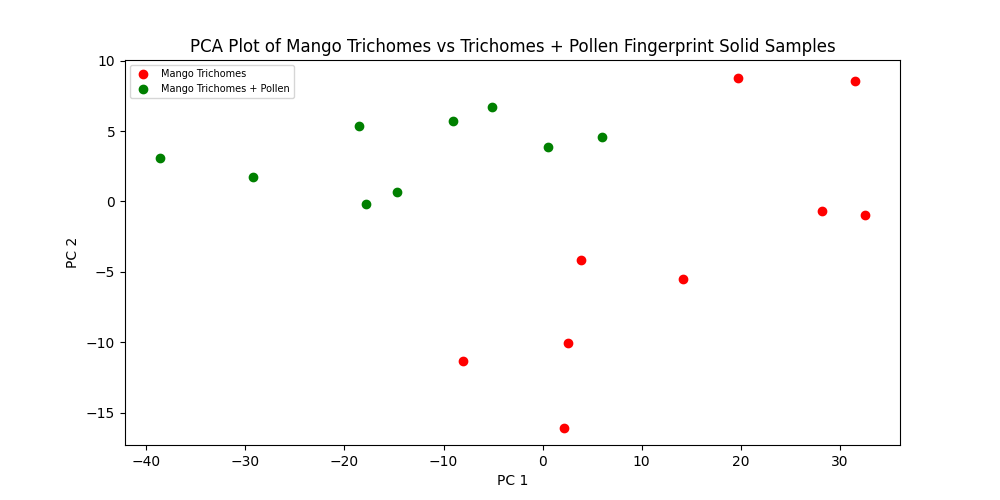

In [8]:
t = pd.read_csv("mango_trichomes/compiled_spectral_data/mango_trichomes_32_scans.csv")
t_p = pd.read_csv("trichomes_pollen/compiled_spectral_data/trichomes_pollen_scan32.csv")

formal_group_names = ["Mango Trichomes", "Mango Trichomes + Pollen"]

main_df = pca_compile(df_list=[t, t_p], class_list=formal_group_names, indexer=[1068,1552])
run_pca(main_df, plot_title="PCA Plot of Mango Trichomes vs Trichomes + Pollen Fingerprint Solid Samples", colors=['red', 'green'])